한글 깨짐 방지

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' # 폰트 컴퓨터 위치에 따라 설정 해야함
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


mglearn 설치

In [2]:
pip install mglearn

In [3]:
import mglearn
import matplotlib.pyplot as plt

K-최근접 이웃

K-최근접 이웃 분류: 알고리즘이 훈련 데이터셋에서 가장 가까운 데이터 포인트를 찾음-> 최근접 이웃 (Nearest Neighbors)

forge 데이터셋 분류 예 -> forge 데이터셋에 대한 1-최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


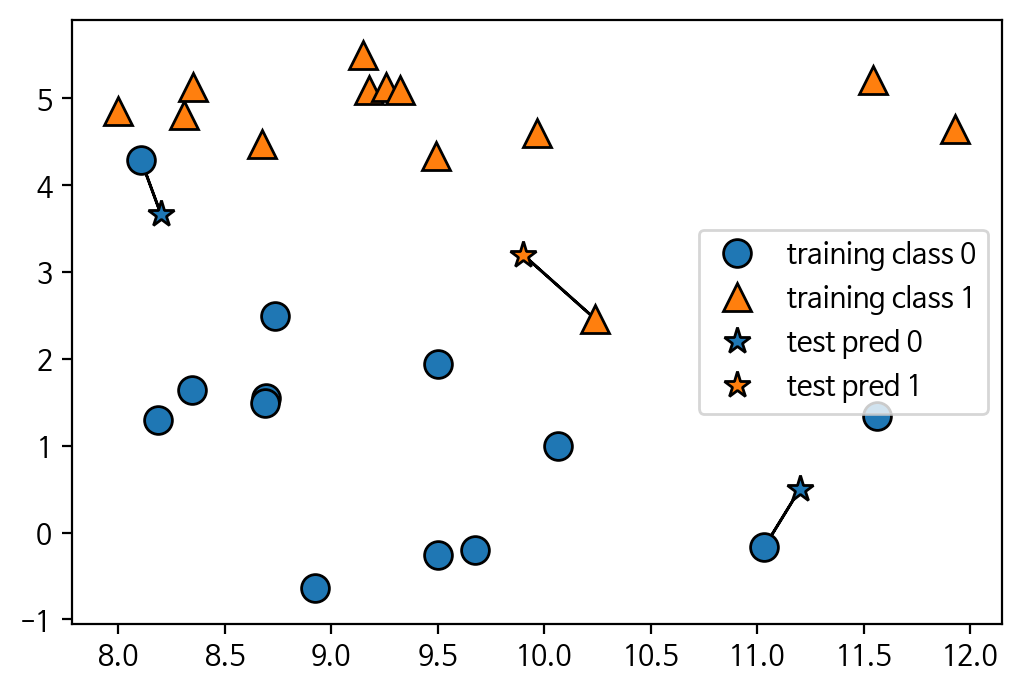

In [12]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

mglearn.plots.plot_knn_classification(n_neighbors=1) # 제일 근접한 1개 이웃 선택

forge 데이터셋 분류 예 -> forge 데이터셋에 대한 3-최근접 이웃 모델의 예측

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


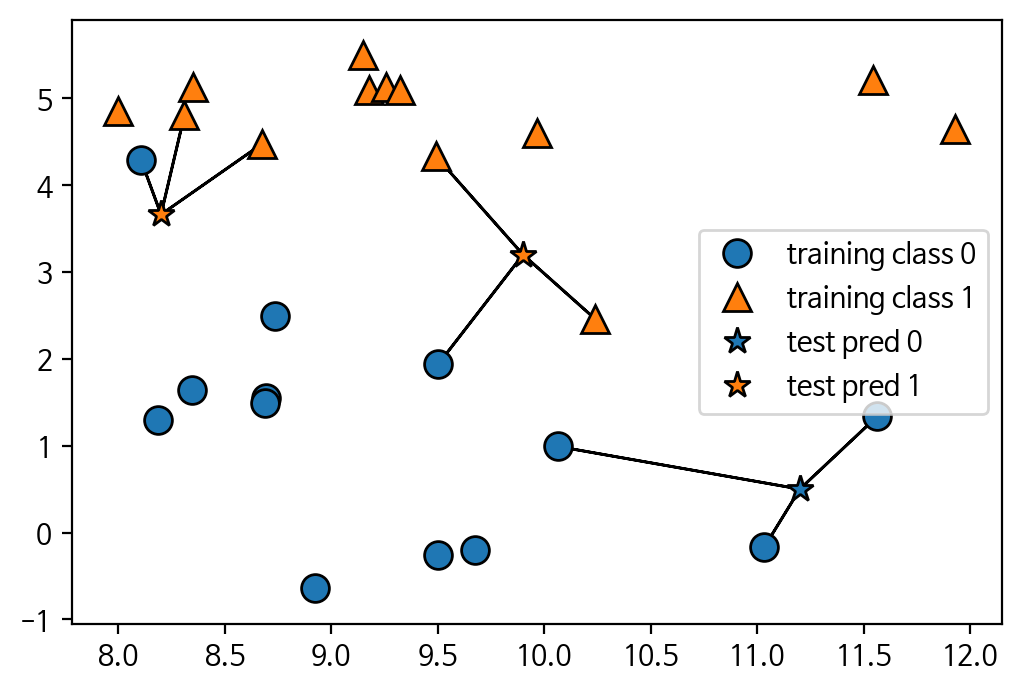

In [31]:
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

mglearn.plots.plot_knn_classification(n_neighbors = 3) # 제일 근접한 1개 이웃 선택

분류 문제정의 : forge 데이터 셋을 사용한 이진 분류 (Label,1) 예측하기 <br>
K-최근접 이웃 알고리즘 적용하여 예측 하고 평가하기

데이터 준비하기

In [18]:
X, y = mglearn.datasets.make_forge()  # X : 데이터(feature), y : 레이브(label, 정답)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [19]:
X

array([[ 9.96346605,  4.59676542],
       [11.0329545 , -0.16816717],
       [11.54155807,  5.21116083],
       [ 8.69289001,  1.54322016],
       [ 8.1062269 ,  4.28695977],
       [ 8.30988863,  4.80623966],
       [11.93027136,  4.64866327],
       [ 9.67284681, -0.20283165],
       [ 8.34810316,  5.13415623],
       [ 8.67494727,  4.47573059],
       [ 9.17748385,  5.09283177],
       [10.24028948,  2.45544401],
       [ 8.68937095,  1.48709629],
       [ 8.92229526, -0.63993225],
       [ 9.49123469,  4.33224792],
       [ 9.25694192,  5.13284858],
       [ 7.99815287,  4.8525051 ],
       [ 8.18378052,  1.29564214],
       [ 8.7337095 ,  2.49162431],
       [ 9.32298256,  5.09840649],
       [10.06393839,  0.99078055],
       [ 9.50048972, -0.26430318],
       [ 8.34468785,  1.63824349],
       [ 9.50169345,  1.93824624],
       [ 9.15072323,  5.49832246],
       [11.563957  ,  1.3389402 ]])

In [20]:
y

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0])

일반화 성능을 평가할 수 있도록 데이터 분리 (교차겸증) -> 훈련세트(trainset) 테스트 세트(testest)

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=7)

KNeighborsClassifier를 입포트하고 객체 생성

In [25]:
from sklearn.neighbors import  KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors = 3) # 이웃의 수 3개 지정

훈련 세트를 사용하여 분류 모델 학습

In [26]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

테스트 데이터 대해 predict 메서드를 호출해서 예측

테스트 세트의 각 데이터 포인트에 대해 훈련 세트에서 가장 가까운 이웃을 계산 -> 다음 가장 많은 클래스를 찾기 -> 예측

In [27]:
clf.predict(X_test)

array([0, 1, 0, 0, 0, 1, 1])

모델이 얼마나 잘 일반화되었는지 평가 -> 정확도

score() 함수 사용 -> 테스트 데이타와 테스트 레이블을 넣어 호출

In [28]:
clf.score(X_test, y_test)

0.8571428571428571

In [29]:
clf.score(X_train, y_train)

0.9473684210526315

KNeighborsClassifier 분석


*   이웃을 하나 선택했을 때는 결정 경계가 훈련 데이터에 가깝게 따라가고 있음
*   이웃의 수를 늘릴수록 결정 경계는 더 부드러워짐
*   부드러운 경계는 더 단순한 모델을 의미



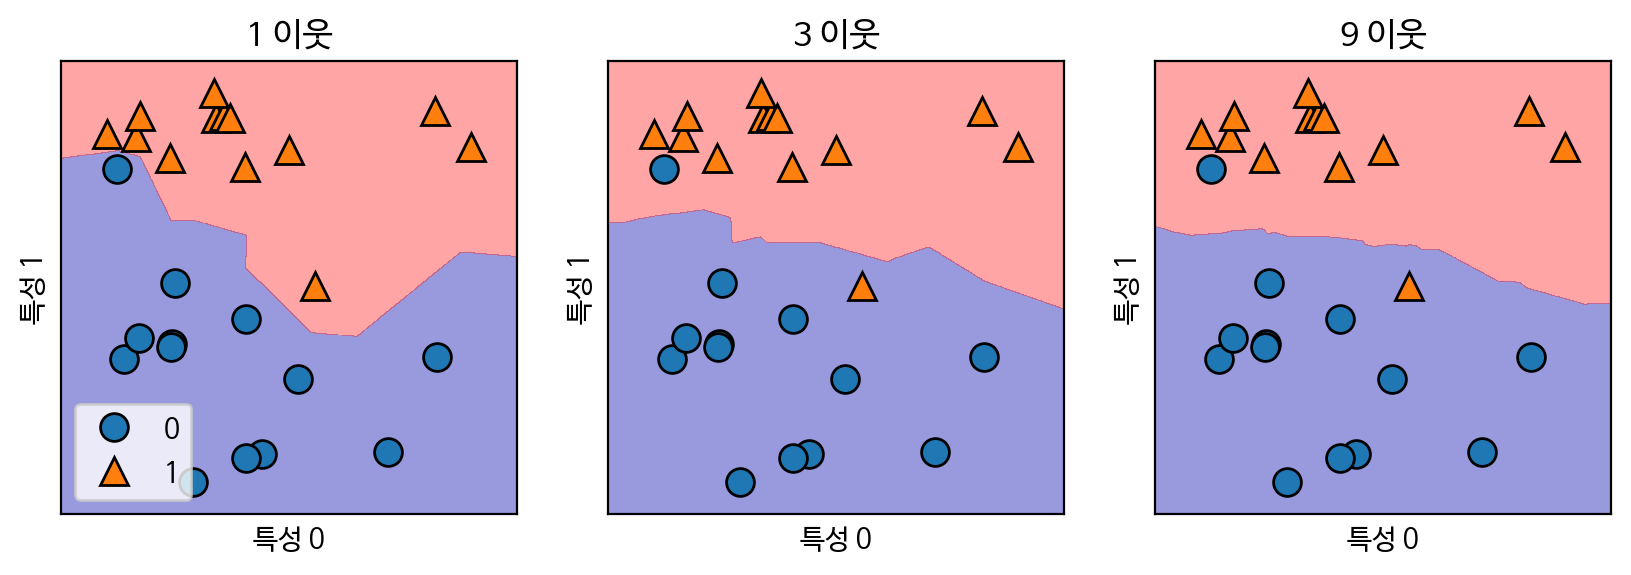

In [44]:
fig, axes = plt.subplots(1,3, figsize=(10,3), dpi=100)

for n_neighbors, ax in zip([1, 3, 9], axes) : #이웃을 1,3,9 일 때의 결정 경계 (decision boundary)

  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X ,fill=True, eps=0.5, ax=ax, alpha=.4) # 결정 경계 그리기
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax )# 2차원 산점도의 데이터셋 그리기 위해

  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)
plt.show()

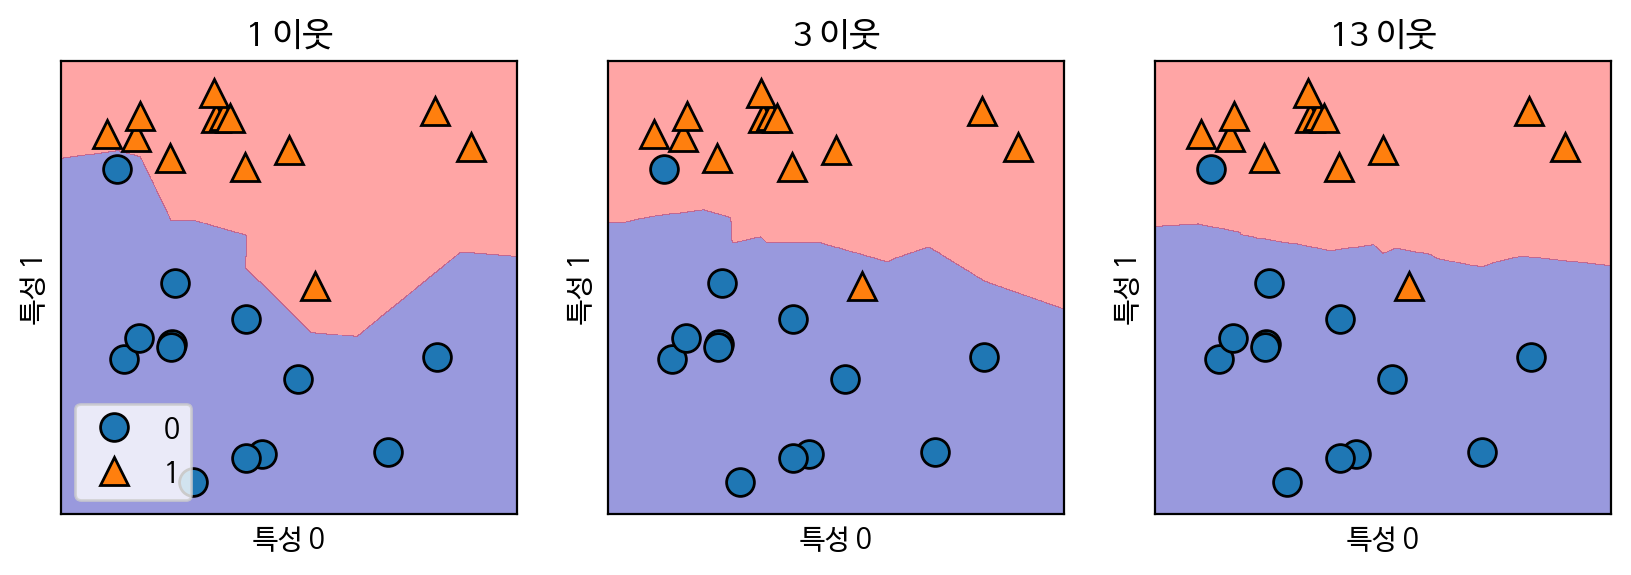

In [57]:
fig, axes = plt.subplots(1,3, figsize=(10,3), dpi=100)

for n_neighbors, ax in zip([1, 3, 13], axes) : #이웃을 1,10, 15 일 때의 결정 경계 (decision boundary)

  clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)

  # 2차원 데이터셋 분할 평면 그리기 mglearn.plot_2d_separator(model 객체, train 데이터, 평면 칠하기, 투명도)
  mglearn.plots.plot_2d_separator(clf, X ,fill=True, eps=0.5, ax=ax, alpha=.4) # 결정 경계 그리기
  mglearn.discrete_scatter(X[:,0], X[:,1], y, ax=ax )# 2차원 산점도의 데이터셋 그리기 위해

  ax.set_title("{} 이웃".format(n_neighbors))
  ax.set_xlabel("특성 0")
  ax.set_ylabel("특성 1")

axes[0].legend(loc=3)
plt.show()

이웃의 수(결정경계)에 따른 성능 평가

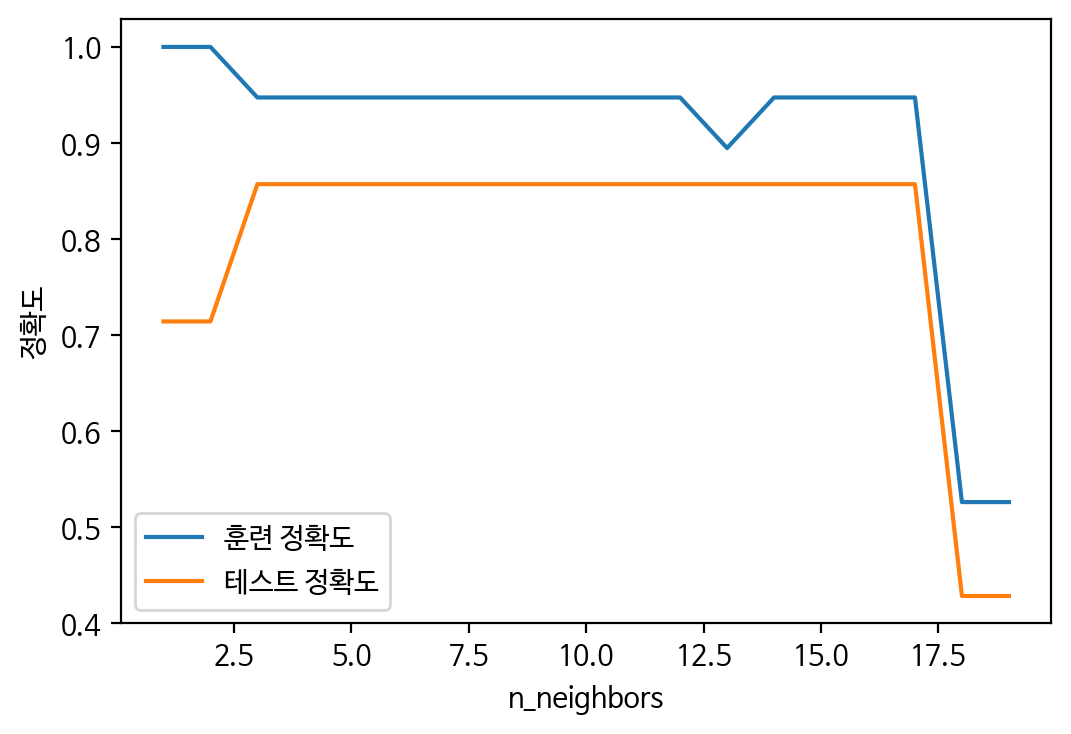

In [55]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1 ~10 까지 n_neighbors를 적용

neighbors_settings = range(1,20)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 


plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

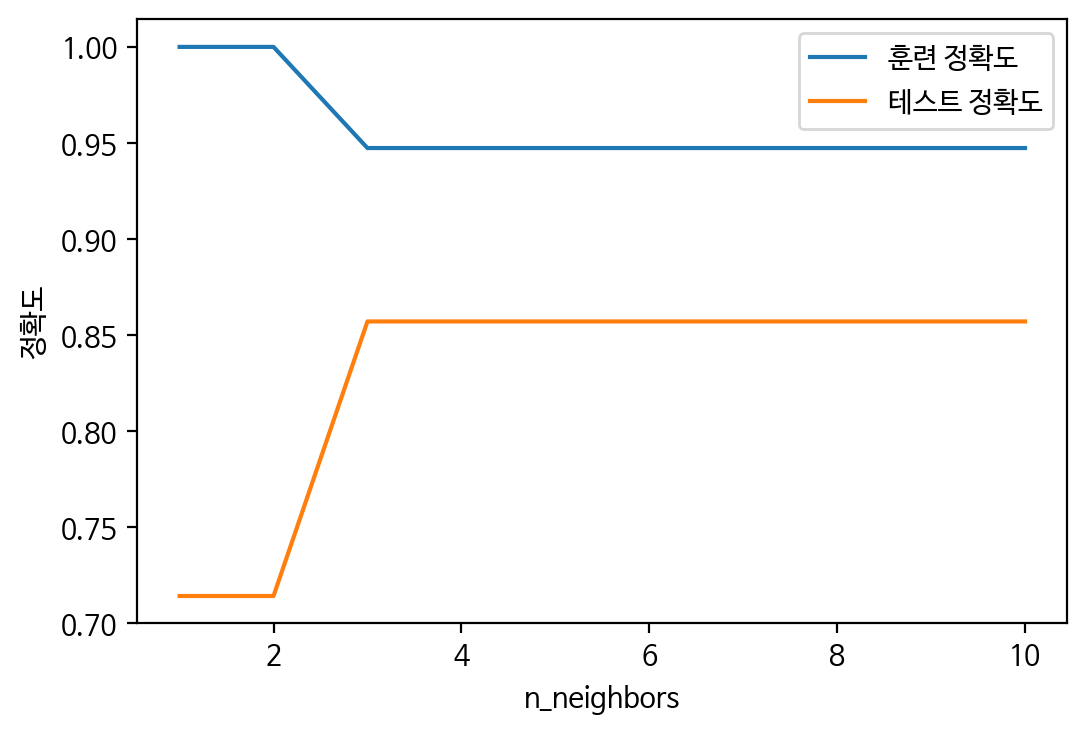

In [53]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1 ~10 까지 n_neighbors를 적용

neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 


plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

유방암 데이터셋을 사용하여 이웃의 수 (결정경계)에 따른 성능 평가

데이터 준비하기

In [58]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() # 데이터 다운로드

데이터셋 분리하기( 훈련셋, 테스트셋)

랜덤 스테이트 777 설정시

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(
    cancer.data,cancer.target, stratify = cancer.target, random_state=777
)

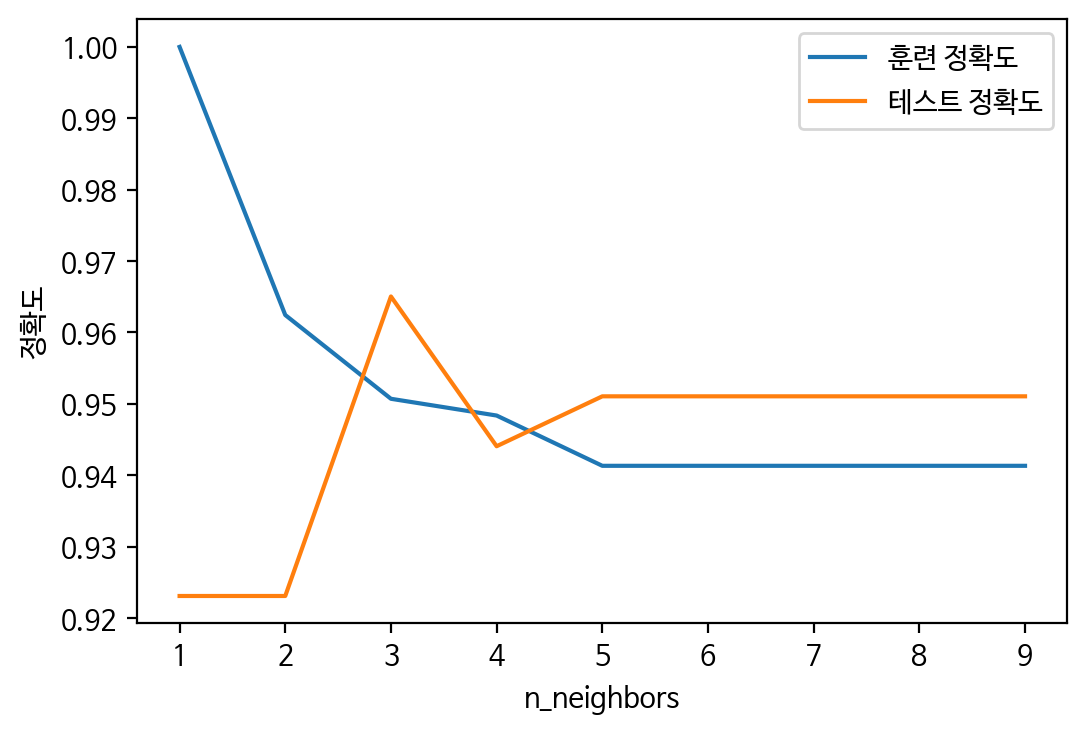

In [82]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1 ~10 까지 n_neighbors를 적용

neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 


plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

랜덤 스테이트 77 설정시

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(
    cancer.data,cancer.target, stratify = cancer.target, random_state=77
)

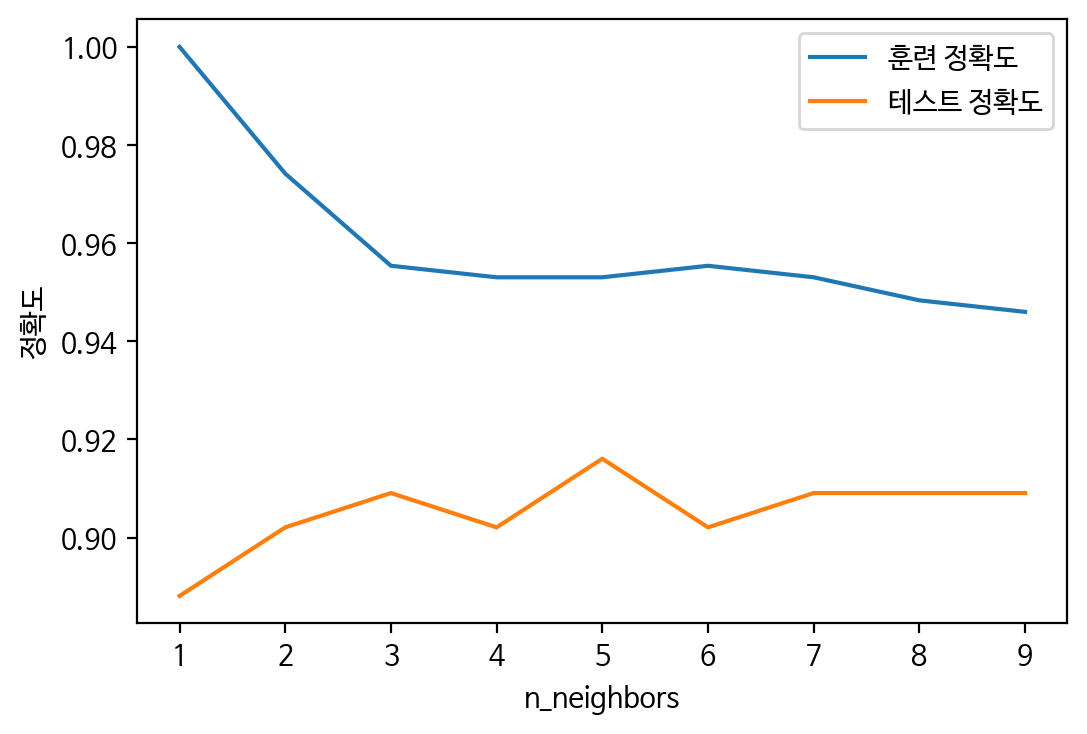

In [70]:
# 이웃의 수에 따른 정확도 저장할 리스트 변수
train_accuracy = []
test_accuracy = []

# 1 ~10 까지 n_neighbors를 적용

neighbors_settings = range(1,10)

for n_neighbors in neighbors_settings :

  # 모델 생성
  clf = KNeighborsClassifier(n_neighbors)
  clf.fit(X_train, y_train)

  # 훈련 세트 정확도 저장
  train_accuracy.append(clf.score(X_train,y_train))

  # 테스트 세트 정확도 저장
  test_accuracy.append(clf.score(X_test, y_test))

# 훈련 VS 테스트 정확도 시각화
plt.figure(dpi=100)
plt.rc('font', family='NanumBarunGothic') 


plt.plot(neighbors_settings, train_accuracy, label='훈련 정확도')
plt.plot(neighbors_settings, test_accuracy, label='테스트 정확도')
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

성능 평가 - ROC 커브

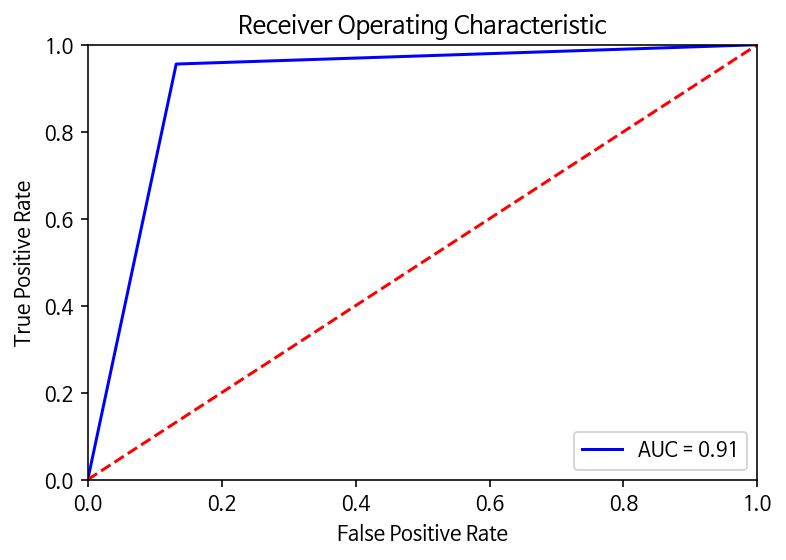

In [83]:
# Library for Analysing the ML model
from sklearn import metrics

# 모델 생성
clf = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
probs = clf.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr,tpr)

    # method I:plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label= 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [85]:
# test data 를 가지고 y_hat을 예축 (분류)
y_hat = clf.predict(X_test)

# 모형 성늘 평가 - 평가지표 계산
knn_report = metrics.classification_report(y_test, y_hat)
print(knn_report)

              precision    recall  f1-score   support

           0       0.92      0.87      0.89        53
           1       0.92      0.96      0.94        90

    accuracy                           0.92       143
   macro avg       0.92      0.91      0.92       143
weighted avg       0.92      0.92      0.92       143



In [86]:
# sklearn 을 이용하면 전부 계산해준다.
print('accuracy:', metrics.accuracy_score(y_test,y_hat))
print('precision:', metrics.precision_score(y_test,y_hat))
print('recall:', metrics.recall_score(y_test,y_hat))
print('f1:', metrics.f1_score(y_test,y_hat))

accuracy: 0.9230769230769231
precision: 0.9247311827956989
recall: 0.9555555555555556
f1: 0.9398907103825136


k-Neighbors Regression
* k=1 경우 그냥 가장 가까운 이웃의 타켓값
* k >=2 경우 회귀분석 -> 여러 개의 최근접 이웃 간의 평균(average or mean)이 예측 값


wave 데이터셋을 사용하여 이웃의 수(결정경계)에 따라 성능 평가

데이터 셋 분리하기(훈련셋, 테스트셋)

In [96]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터 셋을 훈련세트와 테스트 세트로 나눔
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0) # test size = 0.25

KNeighborRegressor를 임포트하고 객체 생성

In [97]:
reg = KNeighborsRegressor(n_neighbors=3)

훈현 세트를 사용하여 회귀 모델 학습

In [98]:
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

성능평가 하기

In [99]:
# score r-square 결정계수 0~1 사이 값을 갖고, 관계가 높을 수 록 1에 가까운 값을 갖음
# 0에 가까울 수 록 데이터 분포를 제대로 표현하지 못한것
print("테스트 세트 R^2 :{:.2f} ".format(reg.score(X_test,y_test)))

테스트 세트 R^2 :0.83 


KNeighborsRegressor 분석

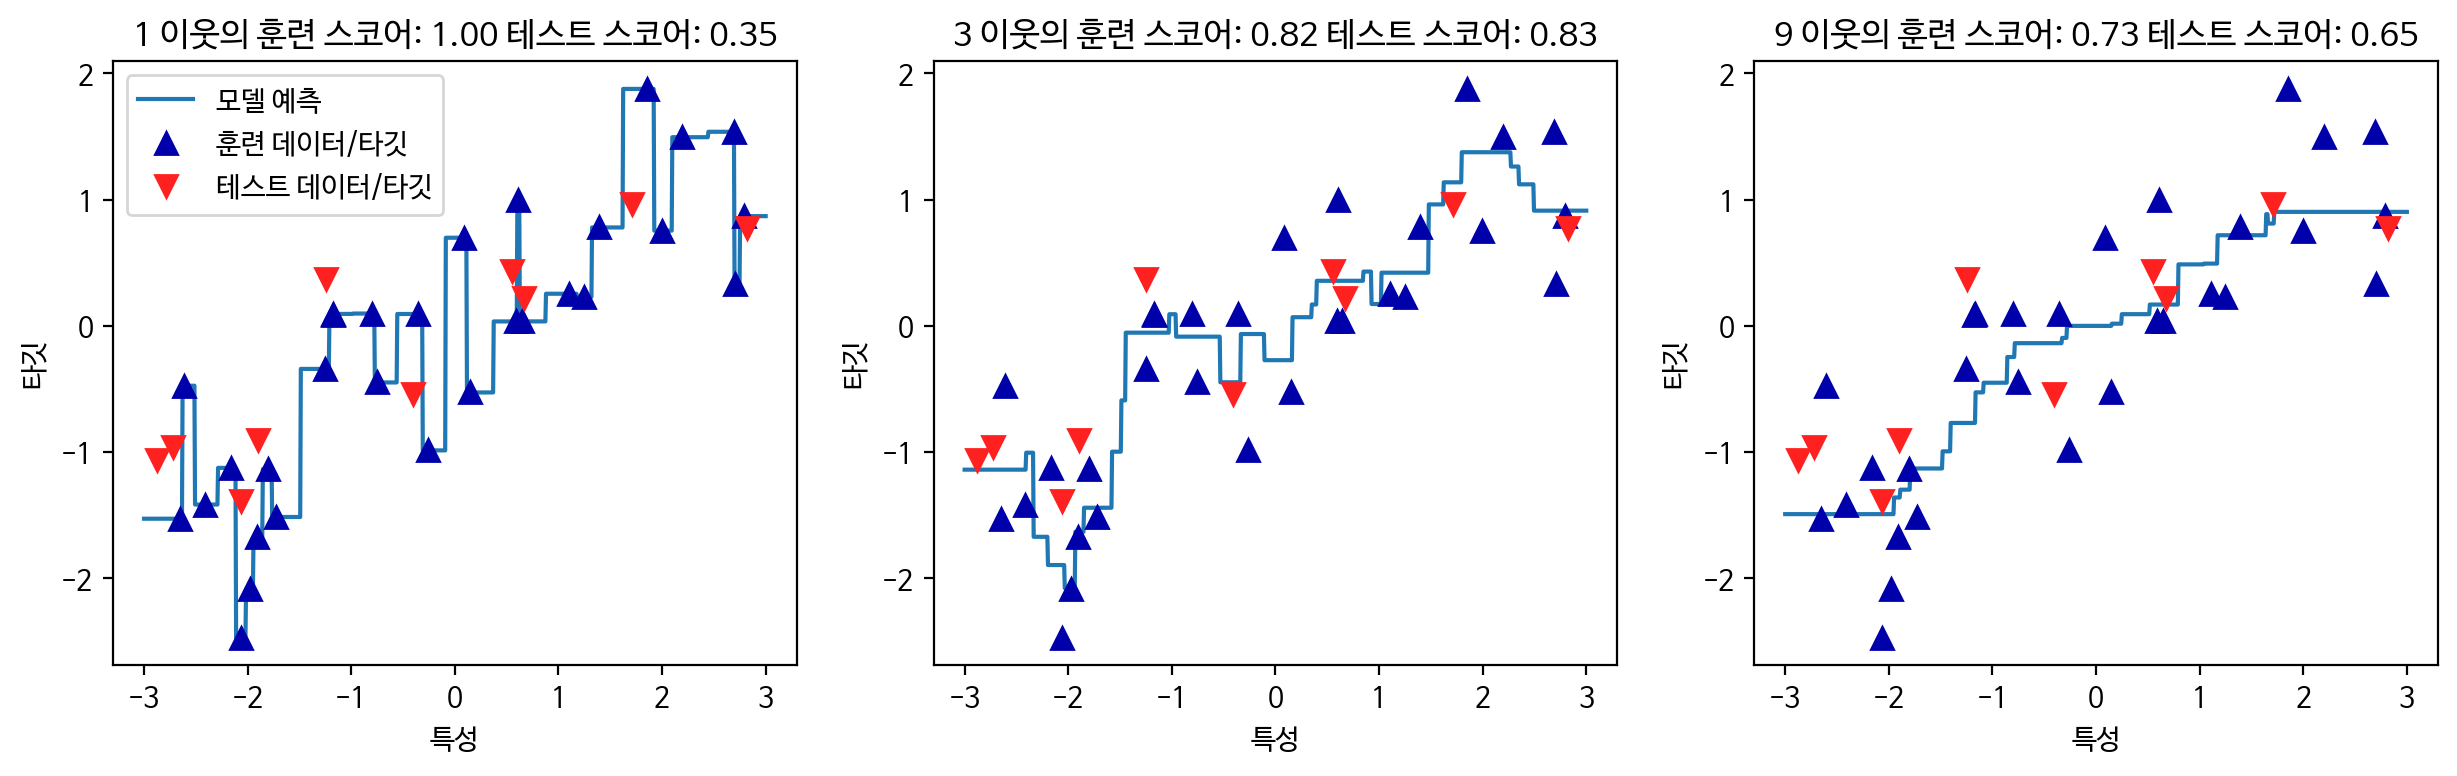

In [101]:
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(15, 4),dpi = 100)
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False

# -3 과 3 사이에 1,000 개의 데이터 포인트를 만듭니다
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1, 3, 9 이웃을 사용한 예측을 합니다
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
    
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")
plt.show()


선형모델 : 선형 함수를 만들어 예측 수행

선형 회귀 모델


w[0]: 0.393906  b: -0.031804


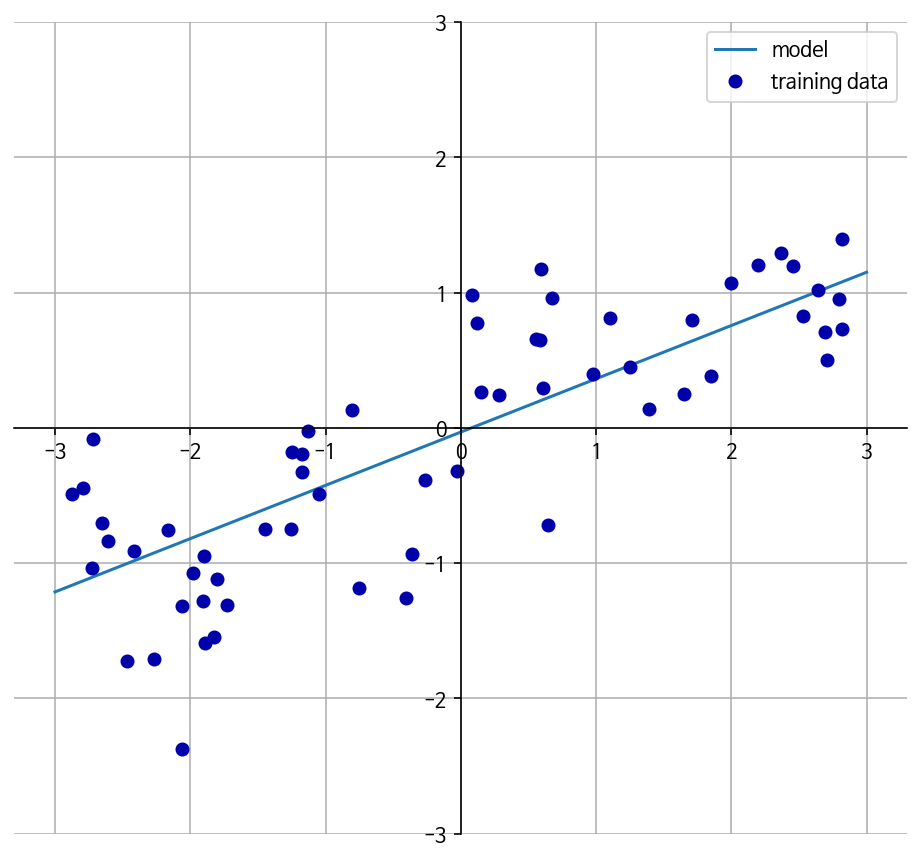

In [102]:
mglearn.plots.plot_linear_regression_wave()

선형회귀(최소제곱법)

데이터 준비하기

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X,y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

선형모델 만든 후 학습시키기

In [104]:
lr = LinearRegression().fit(X_train, y_train)

lr 객체 확인하기

In [109]:
print("lr.coef_ : ", lr.coef_) # w 가중치, 기울기
print("lr.intercept_ :",lr.intercept_) # 절편

lr.coef_ :  [0.39390555]
lr.intercept_ : -0.031804343026759746


성능 평가

In [111]:
print("훈련 세트 점수 :",lr.score(X_train, y_train))
print("테스트 세트 점수 :",lr.score(X_test, y_test)) 
# 훈련-테스트 세트의 점수가 비슷하고, 낮으면 과소 적합된 상항

훈련 세트 점수 : 0.6700890315075756
테스트 세트 점수 : 0.65933685968637


보스턴 주택가격 데이터셋을 하용한 헌형 회귀 성능 결과

데이터 분리하기

In [113]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

훈련 데이터셋으로 학습하기

In [115]:
lr = LinearRegression().fit(X_train, y_train)

성능 평가하기

In [117]:
print("훈련 세트 점수 :",lr.score(X_train, y_train))
print("테스트 세트 점수 :",lr.score(X_test, y_test)) # 과대 적합 상태

훈련 세트 점수 : 0.9520519609032727
테스트 세트 점수 : 0.607472195966557


릿지 회귀 -> 규제를 통해서 과대적합 되지 않게 하기 위한 선형 모델

보스턴 주택가격 데이터셋을 사용한 릿지 회귀 성능 평가

In [124]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train,y_train)

In [125]:
print("훈련 세트 점수 :",ridge.score(X_train, y_train))
print("테스트 세트 점수 :",ridge.score(X_test, y_test)) # 과대 적합 상태

훈련 세트 점수 : 0.8857966585170941
테스트 세트 점수 : 0.7527683481744751


alpha 10 설정

In [129]:
# alpha 값만 조정하여 성능 평가
ridge10 = Ridge(alpha=10).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수 : 0.79
테스트 세트 점수 : 0.64


alpha 0.1 설정

In [130]:
# alpha 값만 조정하여 성능 평가
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수 : 0.93
테스트 세트 점수 : 0.77


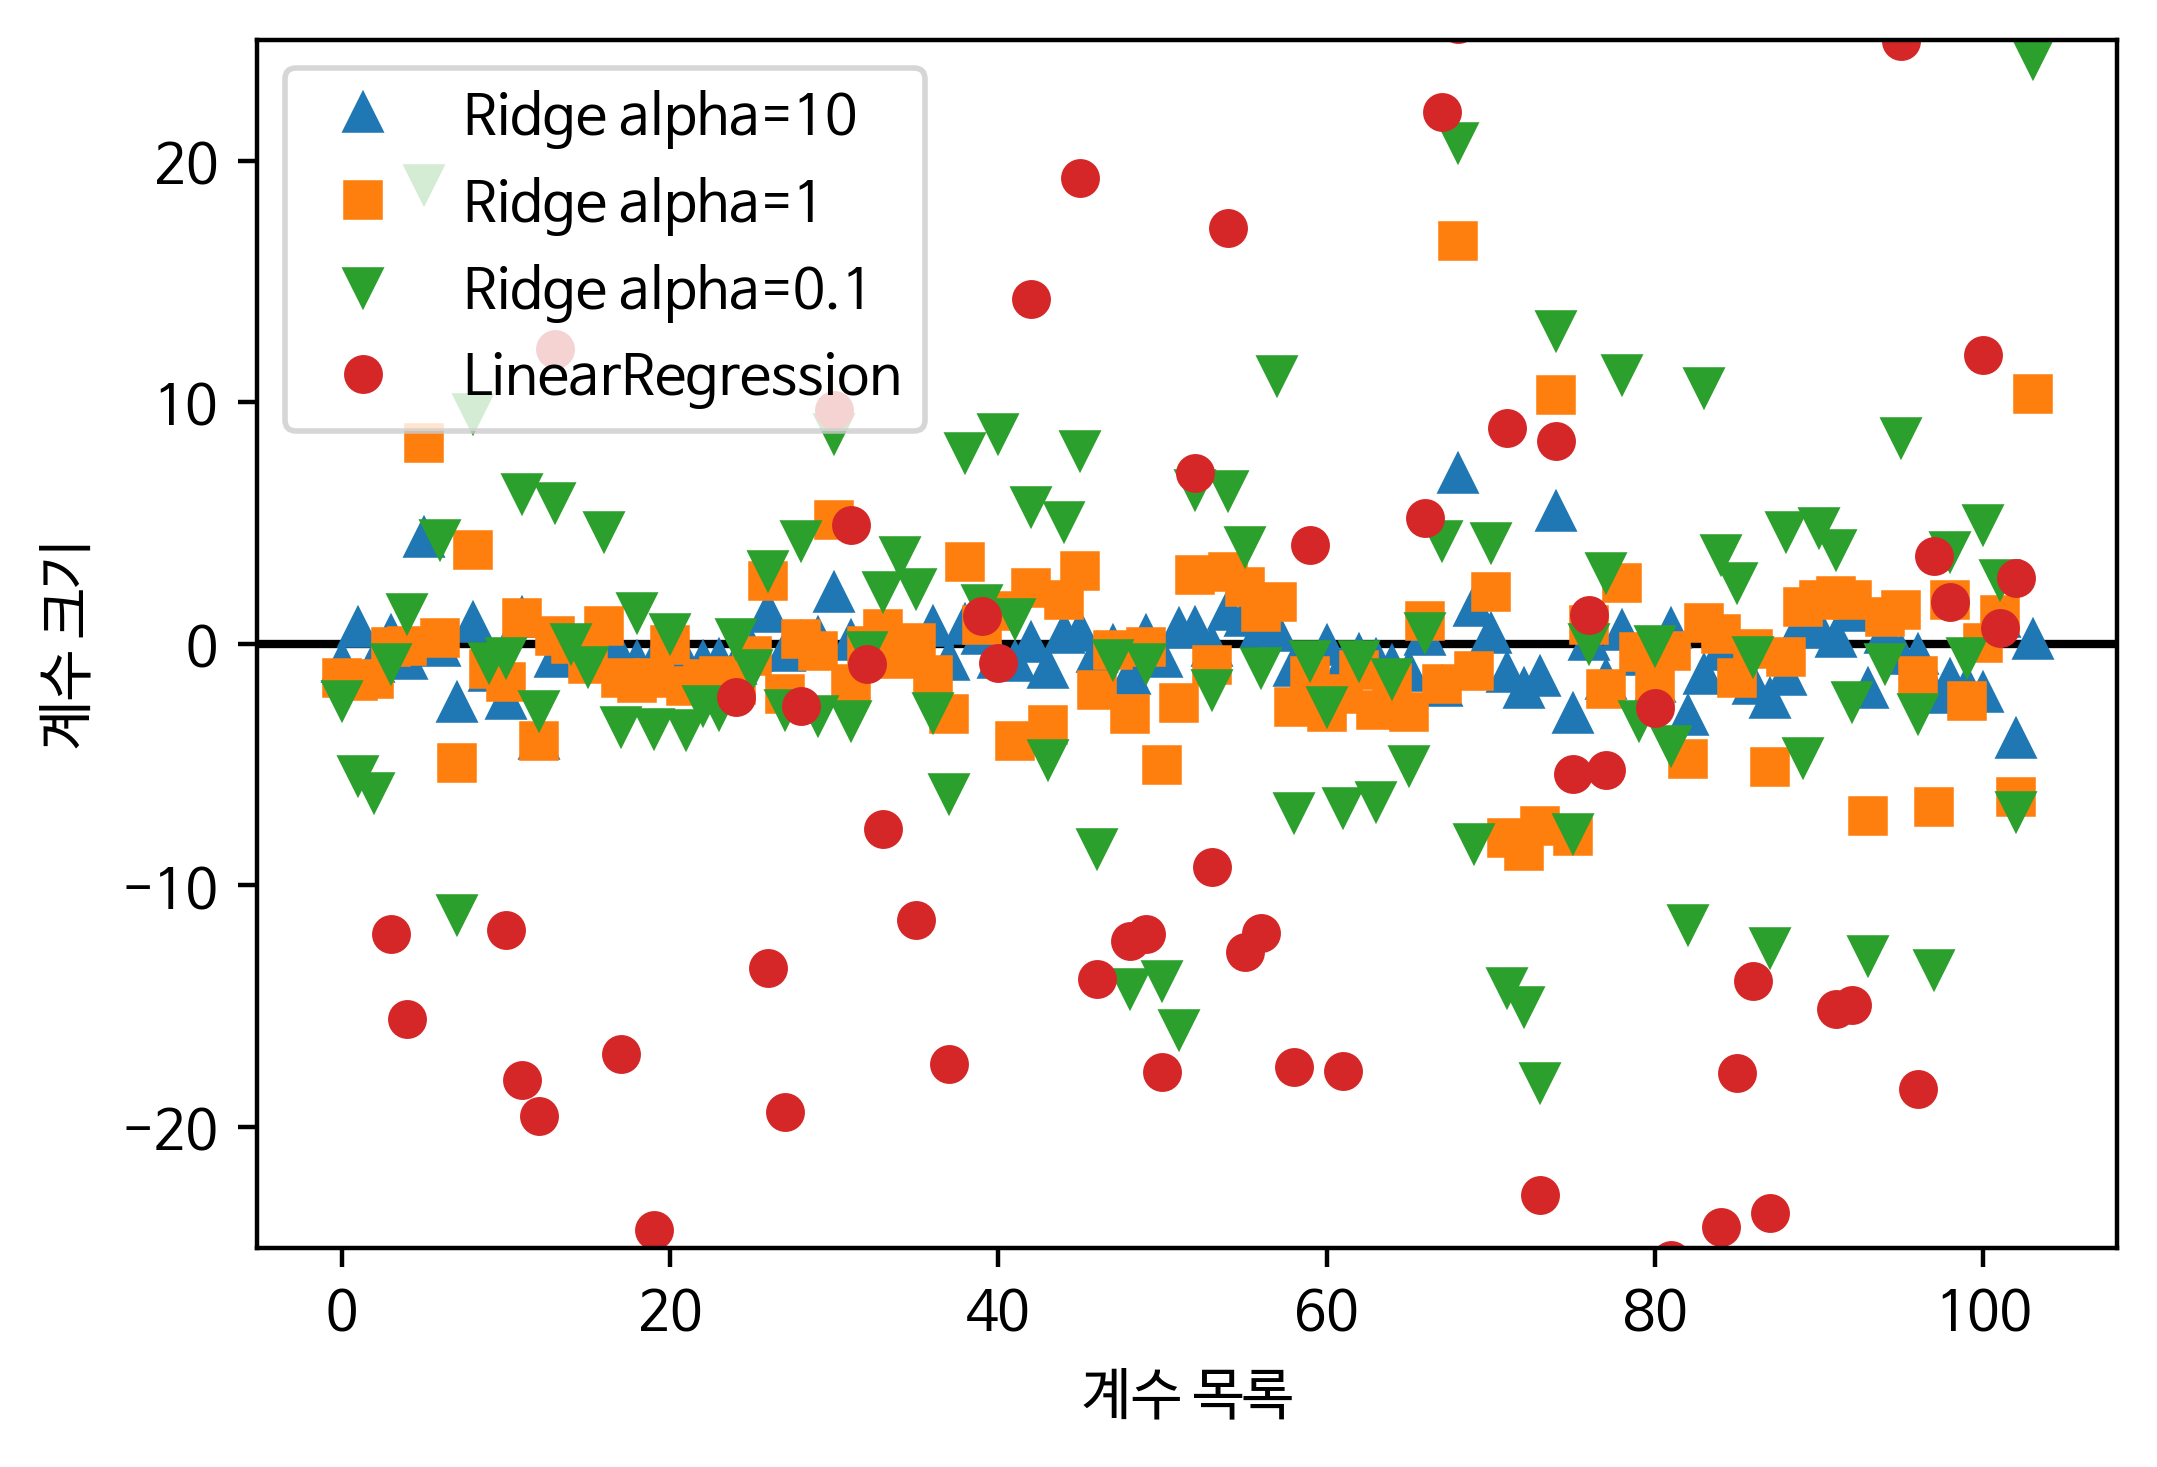

In [131]:
plt.rc('font', family ='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.figure(dpi = 200)

plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()
plt.show()


###Lasso

확장된 보스턴 주택가격 데이터셋에 라쏘를 적용

In [137]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test))) # 과소적합 상태
print("사용한 특성의 개수 : ",np.sum(lasso.coef_ !=0))

훈련 세트 점수 : 0.29
테스트 세트 점수 : 0.21
사용한 특성의 개수 :  4


과소적합을 줄이기 위해서 alpha 값 설정

In [139]:
lasso001 = Lasso(alpha=0.01).fit(X_train,y_train)
print("훈련 세트 점수 : {:.2f}".format(lasso001.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(lasso001.score(X_test, y_test))) # 과소적합 상태
print("사용한 특성의 개수 : ",np.sum(lasso001.coef_ !=0))

훈련 세트 점수 : 0.90
테스트 세트 점수 : 0.77
사용한 특성의 개수 :  32


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.90245800318007, tolerance: 3.233182126649076
  positive)
